## Installing the required libraries

* In order to create charts in this courselet, it is necessary to install a suitable charting module. One of the most widely used charting libraries in Python is [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html), which offers a variety of chart types and extensive customization options.

* To install matplotlib, simply run the following command in your Python environment:


* >`pip install matplotlib`

* While [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) is a commonly used charting library in Python, there are several other popular alternatives that provide additional features and customization options.Some of the other popular charting libraries in Python includes

> * [Seaborn](https://www.mygreatlearning.com/blog/seaborn-tutorial/): [Seaborn](https://www.mygreatlearning.com/blog/seaborn-tutorial/) is a library based on Matplotlib that provides high-level interface for creating informative and attractive statistical graphics. It provides additional functionality like `heat maps`, `violin plots`, and `factor plots`. [Seaborn](https://www.mygreatlearning.com/blog/seaborn-tutorial/) is a great choice for creating complex visualizations for data exploration.

> * [Plotly](https://plotly.com/python/getting-started/): [Plotly](https://plotly.com/python/getting-started/) is a library that allows you to create interactive and dynamic visualizations that can be embedded in web applications or dashboards. It provides a range of chart types and customization options, and allows you to create `animations` and `interactive controls`. [Plotly](https://plotly.com/python/getting-started/) is a great choice if you need to create web-based interactive visualizations.

> * [Altair](https://altair-viz.github.io/altair-tutorial/notebooks/02-Simple-Charts.html): [Altair](https://altair-viz.github.io/altair-tutorial/notebooks/02-Simple-Charts.html) is a library that allows you to create declarative visualizations that are based on a grammar of graphics. It provides a concise and intuitive syntax for creating `charts`, and allows you to easily customize the look and feel of your charts. [Altair](https://altair-viz.github.io/altair-tutorial/notebooks/02-Simple-Charts.html) is a great choice if you want to create complex visualizations with a simple and concise syntax.

## Importing required libraries ([matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html))

* Once you have installed the necessary libraries, you need to import them into your Python script to use their functions. You can do this by adding the following code to your script:

> * `import [matplotlib.pyplot] as plt`

In [1]:
import matplotlib.pyplot as plt

## Charts:

* `Charts`, also known as `graphs`, are visual representations of data that help us better understand the information. `Charts` are a powerful tool in data analysis and can be used to reveal patterns, trends, and relationships in data. In this notebook, we will explore different types of `charts`.

## [Line Graph](https://pythonspot.com/matplotlib-line-chart/)

* A [line chart](https://pythonspot.com/matplotlib-line-chart/) is a chart that displays information as a series of data points connected by `straight lines`. [Line charts](https://pythonspot.com/matplotlib-line-chart/) are used to show trends over time, and they are particularly useful for visualizing data that changes continuously.

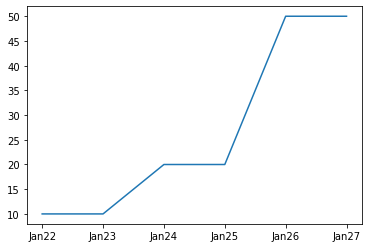

In [2]:
import matplotlib.pyplot as plt
import datetime

dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']
cases = [10, 10, 20, 20, 50, 50]

#plotting the x-axis and y-axis
plt.plot(dates, cases)

# Displaying the graph
plt.show()


But if we see the graph there are labels for x-axis and y-axis and with out them it is difficult to understand what data we are displaying. Now let's see how to add labels for the graph.

### Adding the labels for the graph

* Adding `x-label` <font color=orange><br>
    plt.xlabel('Dates')</font>
* Adding `y-label` <font color=orange><br>
    plt.ylabel('No.of.Cases')</font>

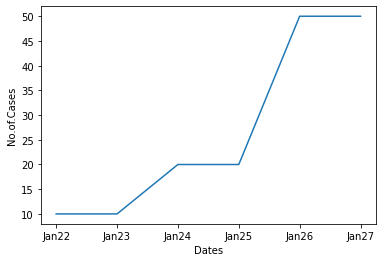

In [3]:
import matplotlib.pyplot as plt
import datetime

dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']
cases = [10, 10, 20, 20, 50, 50]

#plotting the x-axis and y-axis
plt.plot(dates, cases)

# Adding the labels
plt.xlabel('Dates')
plt.ylabel('No.of.Cases')

# Displaying the graph
plt.show()


Now let's see how to add the name for the plot

### Adding the title for the plot

>* <font color=orange>plt.title('No.of.cases over time')</font>


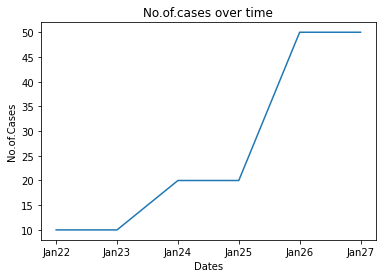

In [4]:
import matplotlib.pyplot as plt
import datetime

dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']
cases = [10, 10, 20, 20, 50, 50]

#plotting the x-axis and y-axis
plt.plot(dates, cases)

# Adding the labels
plt.xlabel('Dates')
plt.ylabel('No.of.Cases')

# Adding the title
plt.title('No.of.cases over time')

# Displaying the graph
plt.show()


### We can also change the color of the line using the color parameter<br>
>* plt.plot(dates, cases,
<font color=orange>color='red'</font>
)

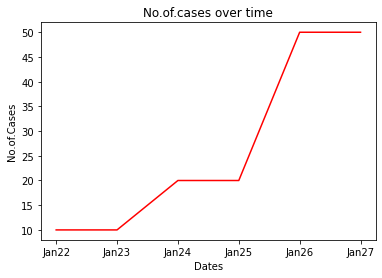

In [5]:
import matplotlib.pyplot as plt
import datetime

dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']
cases = [10, 10, 20, 20, 50, 50]

#plotting the x-axis and y-axis
plt.plot(dates, cases,color='red')

# Adding the labels
plt.xlabel('Dates')
plt.ylabel('No.of.Cases')

# Adding the title
plt.title('No.of.cases over time')

# Displaying the graph
plt.show()


### specifying the plotter points<br>
>* plt.plot(dates, cases,color='red',<font color=orange>marker='o'</font>)

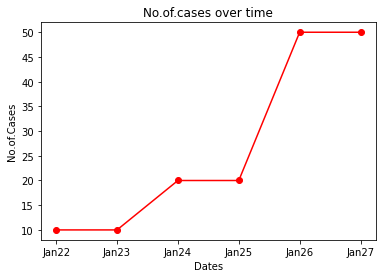

In [6]:
import matplotlib.pyplot as plt
import datetime

dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']
cases = [10, 10, 20, 20, 50, 50]

#plotting the x-axis and y-axis
plt.plot(dates, cases,color='red',marker='o')

# Adding the labels
plt.xlabel('Dates')
plt.ylabel('No.of.Cases')

# Adding the title
plt.title('No.of.cases over time')

# Displaying the graph
plt.show()


## Excercise

1. Change the marker color to the black
2. Change the line style to dashed line style 
3. Consider the dataset <br>
    dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']<br>
    cases = [10, 10, 20, 20, 50, 50]<br>
    deaths= [5,5,5,10,10,25]<br>

    now create seperate plots on the same axis one for dates and cases and one for dates and deaths


## solutions

### <font color=blue>1. Change the marker color to the black</font>

import matplotlib.pyplot as plt<br>
import datetime<br>
dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']<br>
cases = [1, 1, 2, 2, 5, 5]<br>
plt.plot(dates, cases,color='red',marker='o',<font color=orange>markerfacecolor='black'</font>)<br>
plt.xlabel('Dates')<br>
plt.ylabel('No.of.Cases')<br>
plt.title('No.of.cases over time')<br>
plt.show()<br>
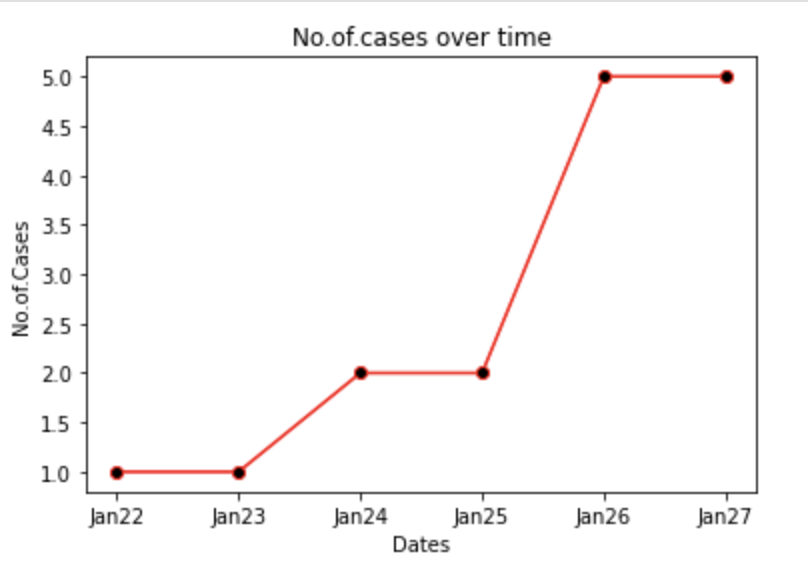

### <font color=blue>2. Change the line style to dashed line style</font><br>

import matplotlib.pyplot as plt<br>
import datetime<br>

dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']<br>
cases = [1, 1, 2, 2, 5, 5]<br>
plt.plot(dates, cases,color='red',marker='o',<font color=orange>linestyle='dashed'</font>)<br>
plt.xlabel('Dates')<br>
plt.ylabel('No.of.Cases')<br>
plt.title('No.of.cases over time')<br>
plt.show()<br>
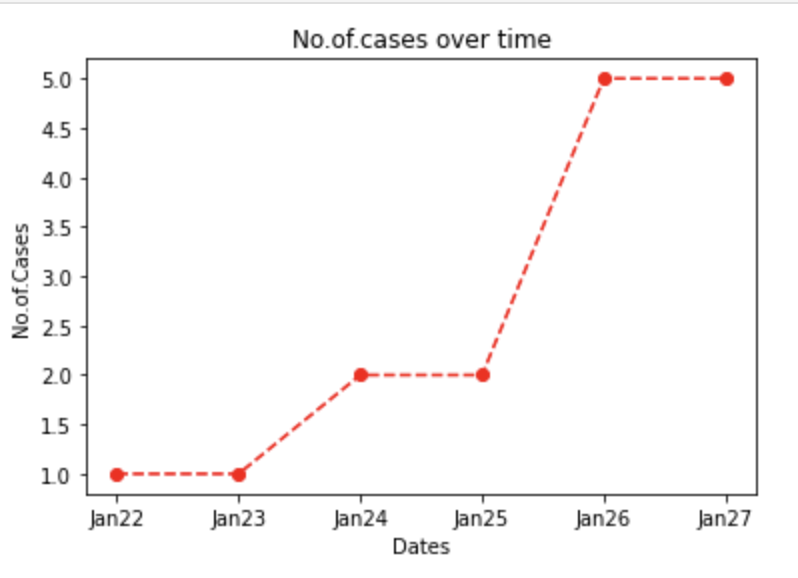


### <font color=blue>3. create seperate plots on the same axis one for dates and cases and one for dates and deaths</font><br>
import matplotlib.pyplot as plt<br>
import datetime<br>

dates = ['Jan22', 'Jan23', 'Jan24', 'Jan25', 'Jan26', 'Jan27']<br>
cases = [10, 10, 20, 20, 50, 50]<br>
deaths= [5,5,5,10,10,25]<br>
plt.plot(dates, cases,color='red',marker='o',<font color=orange>linestyle='dashed'</font>)<br>
plt.xlabel('Dates')<br>
plt.ylabel('Cases and deaths')<br>
plt.title('No.of.cases over time')<br>
plt.plot(dates, deaths,color='red',marker='o',<font color=orange>linestyle='solid'</font>)<br>
plt.xlabel('Dates')<br>
plt.ylabel('Cases and deaths')<br>
plt.title('No.of.cases over time')<br>
plt.show()<br>
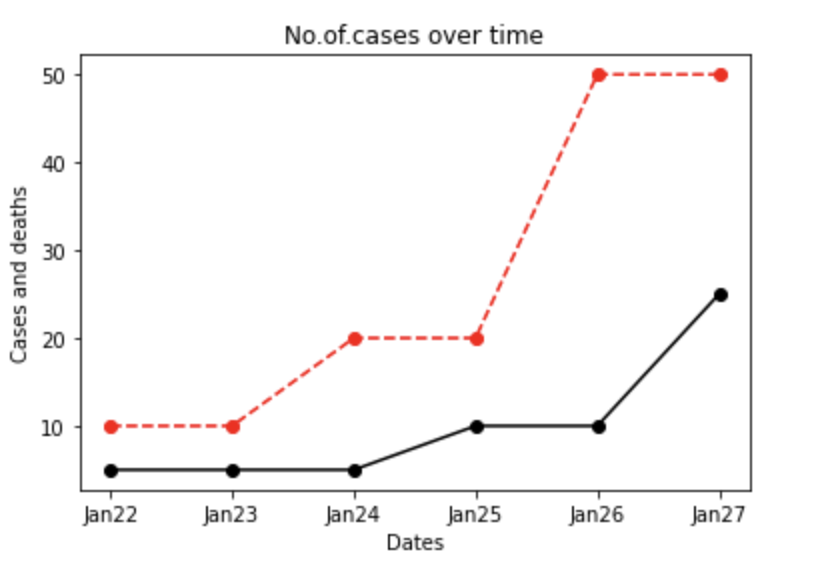


## [Bar graph](https://www.w3schools.com/python/matplotlib_bars.asp)
* A [bar chart](https://www.w3schools.com/python/matplotlib_bars.asp) is a chart that uses `bars` to represent different values or categories of data. The bars can be horizontal or vertical.[Bar charts](https://www.w3schools.com/python/matplotlib_bars.asp) are commonly used to compare items within a category or to compare different categories. They are also used to show changes in values over time.

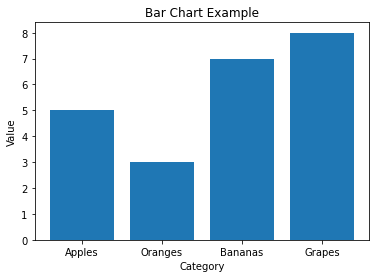

In [19]:
categories = ['Apples', 'Oranges', 'Bananas','Grapes']
values = [5, 3, 7, 8]

# plotting the values
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Chart Example')

# Display the chart
plt.show()


### Changing the colors for the bars

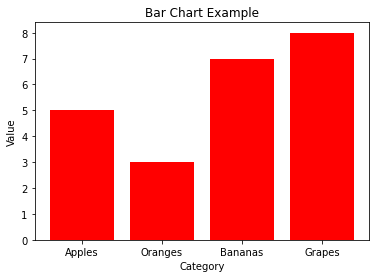

In [8]:
categories = ['Apples', 'Oranges', 'Bananas','Grapes']
values = [5, 3, 7, 8]
prices= [6,7,2,3]
# plotting the values
plt.bar(categories, values,color='red')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Chart Example')

# Display the chart
plt.show()

### Multiple charts

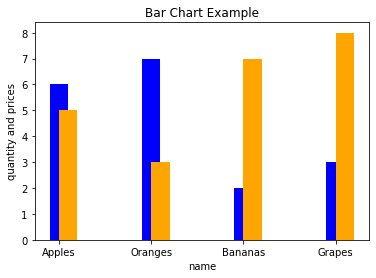

In [9]:
#plotting the first chart
plt.bar(categories, prices,color='blue',width=0.2,label="Price")
#Adding labels and title for first chart
plt.xlabel('name')
plt.ylabel('Quantity and prices')
plt.title('Bar Chart Example')

# plotting the second chart
plt.bar(categories,values,color='orange',label="Quantity",width=0.2, align="edge")
# Adding labels and title for second chart
plt.xlabel('name')
plt.ylabel('quantity and prices')
plt.title('Bar Chart Example')

# Display the chart
plt.show()

### Legend Function
We can use the `legend function` to label the bars so that it is clear which bar represents the price and which bar represents the quantity.

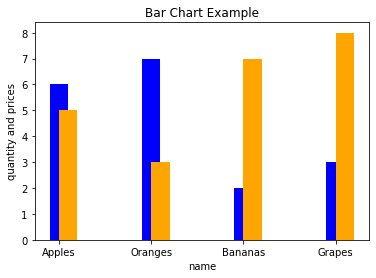

In [10]:
#plotting the first chart
plt.bar(categories, prices,color='blue',width=0.2,label="Price")
#Adding labels and title for first chart
plt.xlabel('name')
plt.ylabel('Quantity and prices')
plt.title('Bar Chart Example')

# plotting the second chart
plt.bar(categories,values,color='orange',label="Quantity",width=0.2, align="edge")
# Adding labels and title for second chart
plt.xlabel('name')
plt.ylabel('quantity and prices')
plt.title('Bar Chart Example')

# Display the chart
plt.show()

### Grid lines
`Grid lines` in a bar chart are horizontal and vertical lines that divide the chart into sections and make it easier to compare the data points.

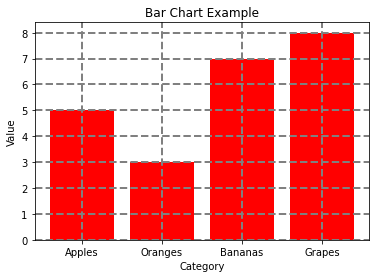

In [11]:
categories = ['Apples', 'Oranges', 'Bananas','Grapes']
values = [5, 3, 7, 8]

# plotting the values
plt.bar(categories, values,color='red')
plt.grid(color='grey', linestyle='--', linewidth=2)
# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Chart Example')

# Display the chart
plt.show()

### Excercise
1. Can you draw only horizontal grid lines?
   
### Solution:
categories = ['Apples', 'Oranges', 'Bananas','Grapes']<br>
values = [5, 3, 7, 8]<br>
plt.bar(categories, values,color='red')<br>
plt.grid(color='grey', linestyle='--',<font color='orange'>axis='y'</font>, linewidth=2)<br>
plt.xlabel('Category')<br>
plt.ylabel('Value')<br>
plt.title('Bar Chart Example')<br>
plt.show()<br>

### Output:
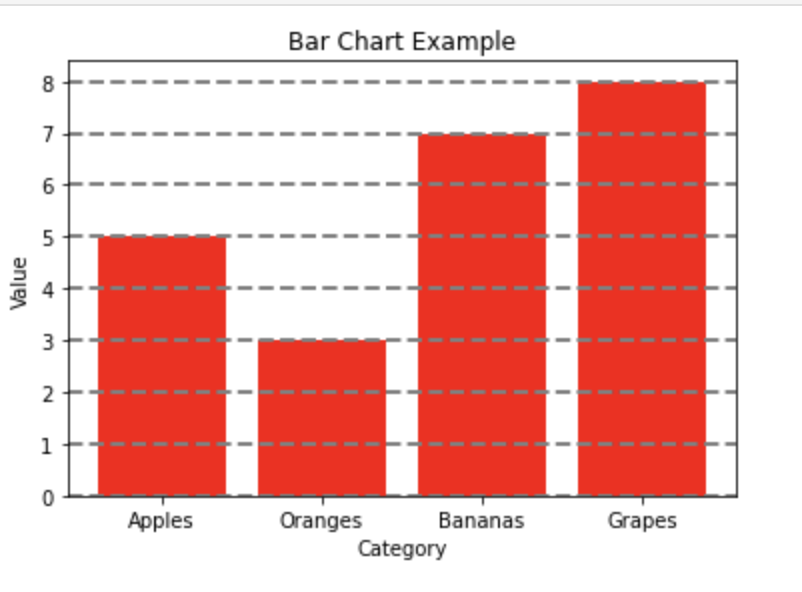


## [Pie Chart](https://www.python-graph-gallery.com/pie-plot-matplotlib-basic)

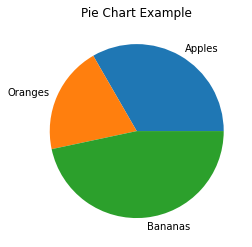

In [12]:
# Define categories
categories = ['Apples', 'Oranges', 'Bananas']

# Define values for each category
values = [5, 3, 7]

# Plot the pie chart
plt.pie(values, labels=categories)

# Add title
plt.title('Pie Chart Example')

# Display the chart
plt.show()


### Explode
* We can also use the `explode` parameter to separate a slice from the rest of the pie.

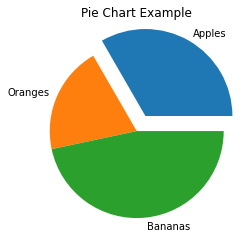

In [13]:
# Define categories
categories = ['Apples', 'Oranges', 'Bananas']

# Define values for each category
values = [5, 3, 7]

# Plot the pie chart
plt.pie(values, labels=categories,explode=[0.2,0,0])

# Add title
plt.title('Pie Chart Example')

# Display the chart
plt.show()


since we set `explode`=[0.1, 0, 0, 0], the first slice (in this case, "Apples") will be separated from the center by 10% of the radius of the [pie chart](https://www.python-graph-gallery.com/pie-plot-matplotlib-basic). The other slices will be centered as usual.

### Nested Pie Chart
A `nested pie chart` is a type of pie chart in which there are multiple rings of data displayed within each other. Each ring represents a different category or subcategory of data, with each category having its own set of values that add up to 100%.

`Nested pie charts` can be useful for displaying hierarchical data or for comparing subcategories within larger categories. They can be created in Matplotlib using the same `pie()` function as regular [pie charts](https://www.python-graph-gallery.com/pie-plot-matplotlib-basic), but with a few additional steps.

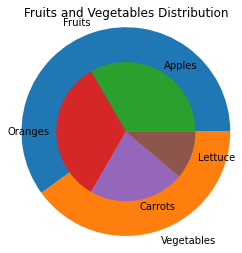

In [14]:
import matplotlib.pyplot as plt

# Define outer and inner data
outer_labels = ['Fruits', 'Vegetables']
outer_values = [60, 40]
inner_labels = ['Apples', 'Oranges', 'Carrots', 'Lettuce']
inner_values = [30, 30, 20, 10]

plt.pie(outer_values, labels=outer_labels,radius=1.2)

# Create inner pie chart
plt.pie(inner_values, labels=inner_labels,radius=0.8)
# Add title
plt.title('Fruits and Vegetables Distribution')

plt.show()


## [Scatter plot](https://realpython.com/visualizing-python-plt-scatter/)
* The `scatter()` function plots one dot for each observation. It needs two arrays of the same length, one for the values of the x-axis, and one for values on the y-axis

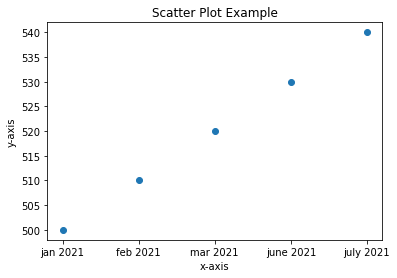

In [15]:
dates =['jan 2021','feb 2021','mar 2021','june 2021','july 2021']
cases=[500,510,520,530,540]

plt.scatter(dates, cases)

# Adding the labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot Example')

#Displaying the Graph
plt.show()


## Multiple plots

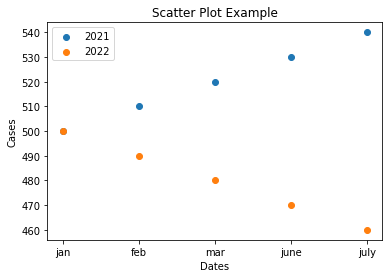

In [16]:
import numpy as np


dates_2021 =['jan','feb','mar','june','july']
cases_2021=[500,510,520,530,540]

plt.scatter(dates_2021, cases_2021,label='2021')

dates_2022 =['jan','feb','mar','june','july']
cases_2022=[500,490,480,470,460]

plt.scatter(dates_2022,cases_2022,label='2022')
# Adding the labels and title
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.title('Scatter Plot Example')

plt.legend()
#Displaying the Graph
plt.show()


## Specifying each color for each dot in [scatter plot](https://realpython.com/visualizing-python-plt-scatter/)
We can specify different color for each dot by passing the array of different colors to the `color` parameter.

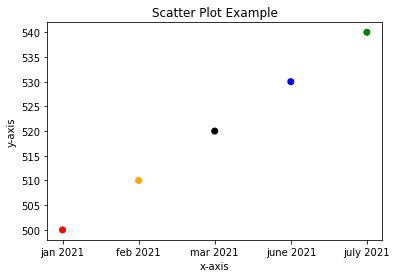

In [17]:
dates =['jan 2021','feb 2021','mar 2021','june 2021','july 2021']
cases=[500,510,520,530,540]
colors=['red','orange','black','blue','green']
plt.scatter(dates, cases,color=colors)

# Adding the labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot Example')

#Displaying the Graph
plt.show()


## Suitable Types of Charts for Different Types of Data in Python
* <b> Types of Data </b>:
1. categorial data
2. Quantitative data
3. ordinal data

<b>categorial data</b> : Categorical data are variables that represent different categories or groups. These categories cannot be ordered in a meaningful way. Examples of categorical data include gender (male, female), eye color (blue, brown, green).<br>
<b>Quantitative data </b>: Quantitative data are variables that represent a numerical quantity or measurement.<br>
<b>Ordinal data</b> : Ordinal data are variables that represent categories that can be ordered in a meaningful way. However, the difference between each category is not necessarily equal. Examples of ordinal data include ranks (1st, 2nd, 3rd), levels of education (elementary, high school, college), and customer satisfaction ratings (poor, fair, good, excellent).

## Here are some commonly used types of charts and the types of data they are most suitable for:

<b>[Bar Chart](https://www.w3schools.com/python/matplotlib_bars.asp)</b>: [Bar charts](https://www.w3schools.com/python/matplotlib_bars.asp) are most suitable for `categorical data`, where the x-axis represents the categories and the y-axis represents the values associated with each category. [Bar charts](https://www.w3schools.com/python/matplotlib_bars.asp) can also be used to represent `ordinal data`, where the categories have a natural order.

<b>[Line Chart](https://pythonspot.com/matplotlib-line-chart/)</b>: [Line charts](https://pythonspot.com/matplotlib-line-chart/) are most suitable for `quantitative data`, where the x-axis represents the time or other continuous variable and the y-axis represents the values associated with each point in time.

<b>[Scatter Plot](https://realpython.com/visualizing-python-plt-scatter/)</b>: [Scatter plots](https://realpython.com/visualizing-python-plt-scatter/) are most suitable for `quantitative data`, where both the x-axis and y-axis represent continuous variables. They can be used to identify patterns, trends, and relationships between two variables.

<b>[Pie Chart](https://www.python-graph-gallery.com/pie-plot-matplotlib-basic)</b>(): [Pie charts](https://www.python-graph-gallery.com/pie-plot-matplotlib-basic) are most suitable for `categorical data`, where the data can be expressed as a percentage or proportion of the whole. They are useful for showing the distribution of data in relation to the total.

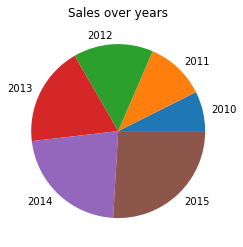

In [18]:
import matplotlib.pyplot as plt

years = ['2010', '2011', '2012', '2013', '2014', '2015']
sales = [100, 150, 200, 250, 300, 350]

plt.pie(sales, labels=years)
plt.title('Sales over years')
plt.show()


However using [Pie Chart](https://www.python-graph-gallery.com/pie-plot-matplotlib-basic) for this data is not suitable.

### Excercise:

1. find the correct type of chart for this data.
2. implement that graph.

### Solution :
<font color='blue'> 1. find the correct type of chart for this data. </font>
1.  A better chart to use in this case would be a [line chart](https://pythonspot.com/matplotlib-line-chart/) or a [bar chart](https://www.w3schools.com/python/matplotlib_bars.asp).

<font color='blue'> 2. implement that graph. </font>

<b> Implementing using the [line graph](https://pythonspot.com/matplotlib-line-chart/) </b>

import matplotlib.pyplot as plt<br>

years = ['2010', '2011', '2012', '2013', '2014', '2015']<br>
sales = [100, 150, 200, 250, 300, 350]<br>

plt.plot(years, sales)<br>
plt.show()<br>

### Output:

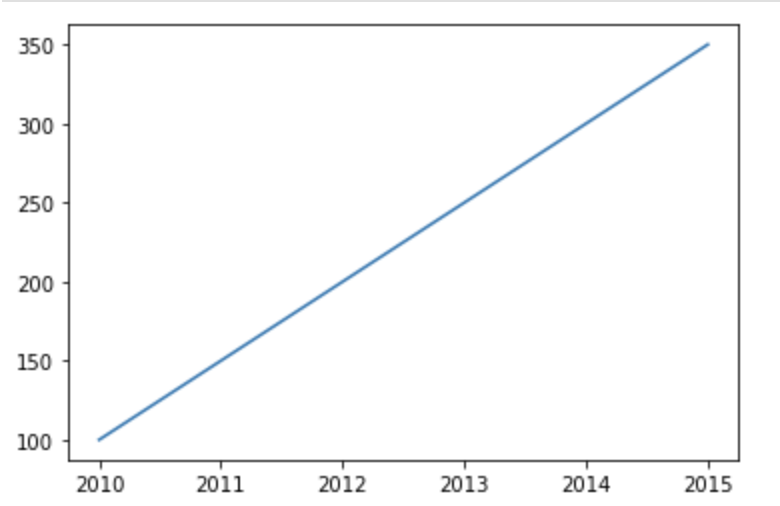

<b> Implementing using the [bar graph](https://www.w3schools.com/python/matplotlib_bars.asp) </b>

import matplotlib.pyplot as plt<br>

years = ['2010', '2011', '2012', '2013', '2014', '2015']<br>
sales = [100, 150, 200, 250, 300, 350]<br>

plt.bar(years, sales)<br>
plt.show()<br>

### Output:

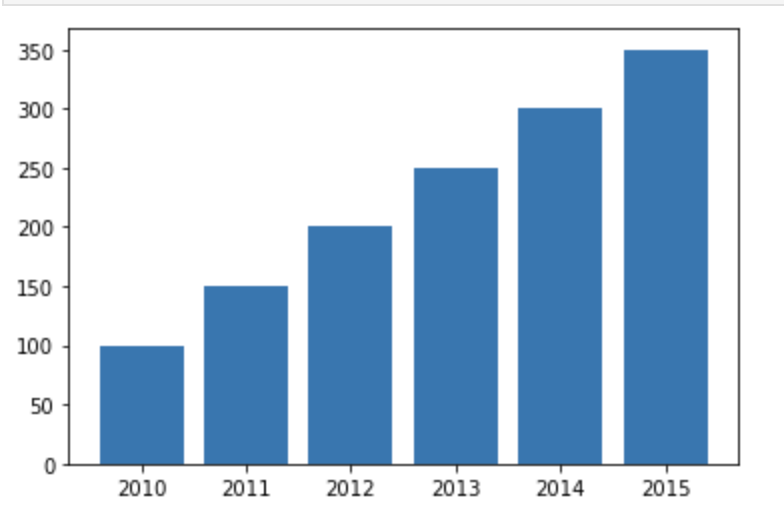

## Excercise:

Create two charts, one for dates and accidents, and one for dates and number of survivors, using the appropriate chart types.You may want to create both charts in the same plot for comparison.This data can be found in the given [excel sheet](https://docs.google.com/spreadsheets/d/1_VDfByrAujt7aDNXsSqismTZ-7SEt9GQg4F1fqNoeq0/edit?usp=sharing)

* Hint : [load the data from the given excel sheet](https://drive.google.com/file/d/1QNnqV4bUvWF_C8xp5us8QCO4-3bZG_w1/view?usp=sharing)

## Solution:

* A better chart to use in this case is line chart.

#### Implementing using the line chart:

import matplotlib.pyplot as plt<br>
import pandas as pd<br>

df = pd.read_excel("Accidents.xlsx")<br>

plt.figure(figsize=(10, 6))<br>
plt.plot(df['Date'], df['No. of Accidents'], label='No. of Accidents')<br>
plt.plot(df['Date'], df['No. of Survivals'], label='No. of Survivals')<br>

plt.title('Accidents and Survivals per Day')<br>
plt.xlabel('Date')<br>
plt.ylabel('Number')<br>

plt.legend()<br>

plt.show()<br>

#### Output:

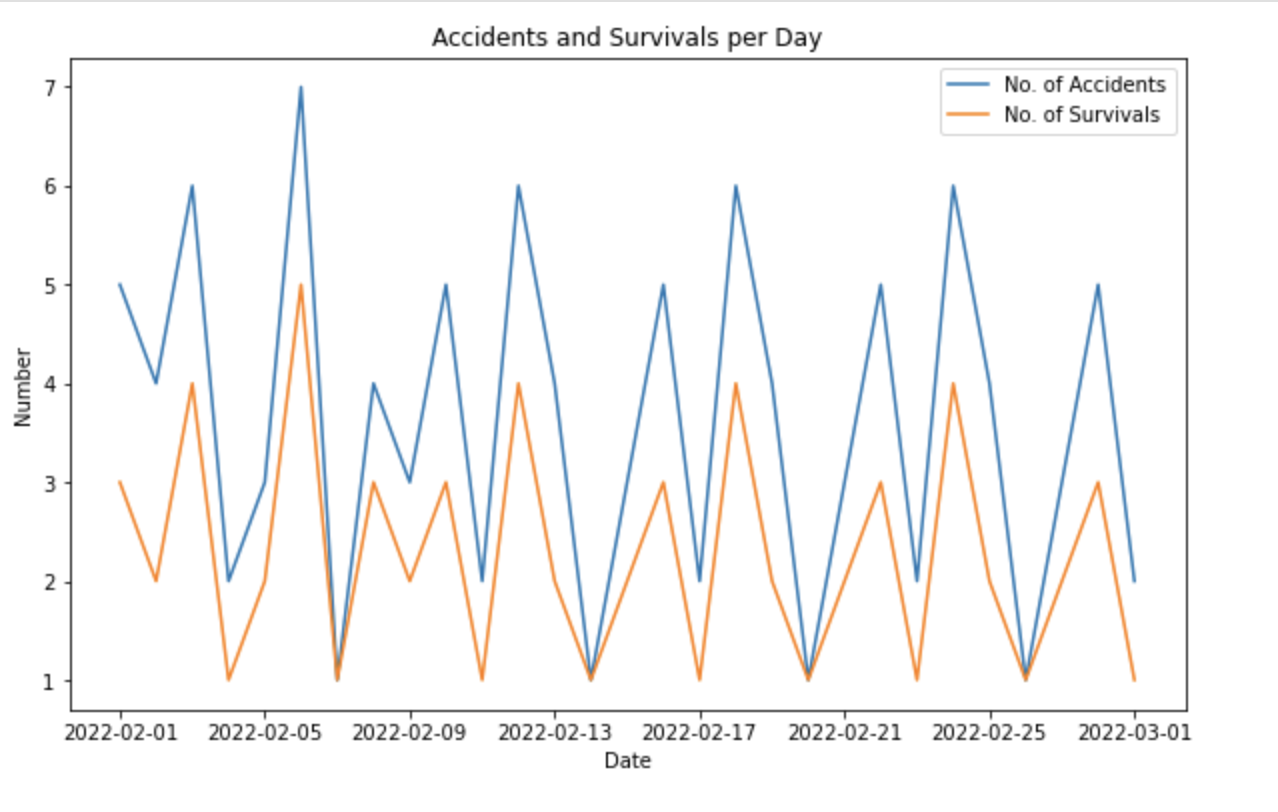

#### Explanation For the Code:

* First, the Pandas library is used to read an Excel file called "Accidents.xlsx" into a DataFrame called df.
* Next, a new figure with a width of 10 inches and height of 6 inches is created using the figure function and figsize parameter.
* Then, two line plots are created using the plot function, one for the number of accidents (df['No. of Accidents']) and one for the number of survivals (df['No. of Survivals']).
* Axes titles and labels are added to the plot using the title, xlabel, and ylabel functions. A legend is also added using the legend function.
* Finally, the plot is displayed using the show function.